Make sure pyslurm is in your path!

In [1]:
import sys
sys.path.append('/home/enes/pyslurm/')
from pyslurm import Slurm

In [2]:
slurm = Slurm(user = 'enes', path = 'default', account = 'stats_dept1')

In [3]:
slurm.queue()

,JOBID,PARTITION,NAME,USER,ACCOUNT,ST,TIME,NODES,NODELIST(REASON)
0,18091040,standard,sys/dash,enes,stats_de,R,1:14:19,1,gl3038


In [4]:
slurm.jobids()

[18091040]

### Running a job

In [5]:
modules = ['python3.8-anaconda/2020.07', 'cuda/11.2.1']
batchset = ['mem-per-cpu=1000', 'job-name="test"']

modules = ['module load '+m for m in modules]
batchset = ['#'+s for s in batchset]

srun = slurm.batch(*(modules+batchset))

In [6]:
# this is what the program will run, notice there are some default settings
srun.lines

['#!/bin/bash',
 '#SBATCH -p standard',
 '#SBATCH --output=/scratch/stats_dept_root/stats_dept1/enes/%x-%j.log',
 '#SBATCH --time=0-2:0:00',
 '#SBATCH --mem-per-cpu=1000',
 '#SBATCH --cpus-per-task=1',
 '#SBATCH --account="stats_dept1"',
 '#SBATCH --job-name="test"',
 '#SBATCH --ntasks=1',
 'module load python3.8-anaconda/2020.07',
 'module load cuda/11.2.1']

In [7]:
# you can remove the default settings by setting it to None
srun = slurm.batch('#mem-per-cpu=None')
srun.lines

['#!/bin/bash',
 '#SBATCH -p standard',
 '#SBATCH --output=/scratch/stats_dept_root/stats_dept1/enes/%x-%j.log',
 '#SBATCH --time=0-2:0:00',
 '#SBATCH --cpus-per-task=1',
 '#SBATCH --account="stats_dept1"',
 '#SBATCH --job-name="myjob"',
 '#SBATCH --ntasks=1']

In [17]:
# running the job
srun = slurm.batch('#mem-per-cpu=100', '#job-name="test"')
jobid = srun.run('python test.py sleep 10') # it will sleep for 10 seconds (check test.py)

In [21]:
# wait >10 secs for job statistics
stats = slurm.my_job_stats(jobid)
stats['State'], stats['Job running time']

('COMPLETED', '00:00:13')

In [22]:
slurm.read_out(jobid)

sleep for 10 seconds
done



### Cancel jobs by jobname and jobtime

In [23]:
sleeptime = 1000

batchset = ['mem-per-cpu=100', 'job-name="sleep"']
srun = slurm.batch(*['#'+s for s in batchset])
# send 10 jobs:
for i in range(10):
    jobid = srun.run('python test.py sleep '+str(sleeptime))
    
batchset = ['mem-per-cpu=100', 'job-name="sleep2"'] # same job with different name
srun = slurm.batch(*['#'+s for s in batchset])
# send 10 jobs:
for i in range(10):
    jobid = srun.run('python test.py sleep '+str(sleeptime))

In [24]:
slurm.queue()

,JOBID,PARTITION,NAME,USER,ACCOUNT,ST,TIME,NODES,NODELIST(REASON)
0,18091498,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
1,18091499,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
2,18091500,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
3,18091501,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
4,18091502,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
5,18091503,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
6,18091504,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
7,18091505,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
8,18091506,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)
9,18091507,standard,sleep,enes,stats_de,PD,0:00,1,(Priority)


In [25]:
# cancel by jobname
slurm.cancel_by(by_name = 'sleep2')

Done!


In [27]:
slurm.queue()

,JOBID,PARTITION,NAME,USER,ACCOUNT,ST,TIME,NODES,NODELIST(REASON)
0,18091498,standard,sleep,enes,stats_de,R,0:20,1,gl3153
1,18091499,standard,sleep,enes,stats_de,R,0:20,1,gl3037
2,18091500,standard,sleep,enes,stats_de,R,0:20,1,gl3037
3,18091501,standard,sleep,enes,stats_de,R,0:20,1,gl3188
4,18091502,standard,sleep,enes,stats_de,R,0:20,1,gl3188
5,18091503,standard,sleep,enes,stats_de,R,0:20,1,gl3178
6,18091504,standard,sleep,enes,stats_de,R,0:20,1,gl3178
7,18091505,standard,sleep,enes,stats_de,R,0:20,1,gl3178
8,18091506,standard,sleep,enes,stats_de,R,0:20,1,gl3178
9,18091507,standard,sleep,enes,stats_de,R,0:20,1,gl3151


In [28]:
# cancel by job time
slurm.cancel_by(by_time = '<10') # It will cancel all the jobs whose runtime <10 mins

Done!


In [30]:
slurm.queue()

,JOBID,PARTITION,NAME,USER,ACCOUNT,ST,TIME,NODES,NODELIST(REASON)
0,18091040,standard,sys/dash,enes,stats_de,R,1:01:13,1,gl3038


the above methods are equivalent to:<br>
`slurm.cancel(slurm.jobids_by(by_name = 'sleep2'))`<br>
`slurm.cancel(slurm.jobids_by(by_time = '<10'))`<br>
You can also cancel all of your jobs by:<br>
`slurm.cancel()`

### Your monthly user usage in the account

In [15]:
slurm.monthly_usage(quota = 20_000_000)

greatlak+     stats_dept1      enes     Enes Dilber        billing    2328231 
Total usage is 62800333 your usage is 2328231 this is 3.71% of the total. You are using 11.64% of your quota.


### Running parallel jobs for your simulations

In [6]:
# Simulate data from Normal(mu, sigma^2)

n = [100, 100000]
mu = [0, -10, 10]
sigma = [1, 2, 5]

# there will be total 2 x 3 x 3 = 18 jobs and numbers will be stored in testout folder (see test.py)

# generate the srun:
modules = ['python3.8-anaconda/2020.07']
batchset = ['mem-per-cpu=100', 'job-name="mynormalsims"']

modules = ['module load '+m for m in modules]
batchset = ['#'+s for s in batchset]

srun = slurm.batch(*(modules+batchset))

In [7]:
jobids = []
for ni in n:
    for mui in mu:
        for sigmai in sigma: 
            cur = [str(i) for i in [ni, mui, sigmai]]
            
            out_path = 'testout/'+'_'.join(cur)+'.npy' 
            args = ' '.join(cur)
            
            job = 'python test.py normal '+ args + ' ' + out_path           
            jobids.append(srun.run(job)) # this will return the jobid
            print('sent: '+job)

sent: python test.py normal 100 0 1 testout/100_0_1.npy
sent: python test.py normal 100 0 2 testout/100_0_2.npy
sent: python test.py normal 100 0 5 testout/100_0_5.npy
sent: python test.py normal 100 -10 1 testout/100_-10_1.npy
sent: python test.py normal 100 -10 2 testout/100_-10_2.npy
sent: python test.py normal 100 -10 5 testout/100_-10_5.npy
sent: python test.py normal 100 10 1 testout/100_10_1.npy
sent: python test.py normal 100 10 2 testout/100_10_2.npy
sent: python test.py normal 100 10 5 testout/100_10_5.npy
sent: python test.py normal 100000 0 1 testout/100000_0_1.npy
sent: python test.py normal 100000 0 2 testout/100000_0_2.npy
sent: python test.py normal 100000 0 5 testout/100000_0_5.npy
sent: python test.py normal 100000 -10 1 testout/100000_-10_1.npy
sent: python test.py normal 100000 -10 2 testout/100000_-10_2.npy
sent: python test.py normal 100000 -10 5 testout/100000_-10_5.npy
sent: python test.py normal 100000 10 1 testout/100000_10_1.npy
sent: python test.py normal 10

#### You can get avarage runtime of your jobs:

In [11]:
mult = [3600, 60, 1] # calc the time in seconds %H%M%S format

rts = []
for jobid in jobids:
    rt = slurm.my_job_stats(jobid)['Job running time']
    rts.append(sum([m*float(i) for m, i in zip(mult, rt.split(':'))]))
    
print('Avarage:',round(sum(rts)/len(rts), 3), 'seconds, Maximum:', max(rts), 'seconds')

Avarage: 2.444 seconds, Maximum: 6.0 seconds


#### Do your analysis after your jobs are done

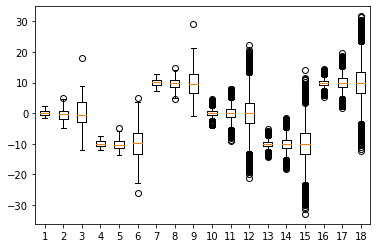

In [13]:
import numpy as np
import matplotlib.pyplot as plt

arr = []
for ni in n:
    for mui in mu:
        for sigmai in sigma: 
            cur = [str(i) for i in [ni, mui, sigmai]]
            out_path = 'testout/'+'_'.join(cur)+'.npy' 
            arr.append(np.load(out_path))
plt.boxplot(arr)
plt.show()